# Laurentia paleogeography plotting

This Jupyter notebook plots paleogeographic reconstructions of Laurentia that are developed within the Laurentia_reconstructions_generate notebook. It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

In [1]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.feature import NaturalEarthFeature, COLORS
duluth_lat = 46.8
duluth_lon = 267.9

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

In [2]:
Laurentia_Provinces_poles = pd.read_csv('../Data/Leirubakki_poles_w_PlateID.csv')
Laurentia_poles = Laurentia_Provinces_poles[Laurentia_Provinces_poles['Plate_ID'] == 1000]
Laurentia_poles.columns

Index(['Unnamed: 0', 'Terrane', 'ROCKNAME', '-10.3', 'COMPONENT', 'TESTS',
       'TILT', 'SLAT', 'SLONG', 'B', 'N', 'DEC', 'INC', 'abs(I)', 'KD', 'ED95',
       'PLAT', 'PLONG', 'DP', 'DM', 'A95', 'f', 'INCf', 'PLATf', 'PLONf',
       'DPf', 'DMf', 'A95f', '%REV', 'DEMAGCODE', '40', '24', '10', '16', '2',
       '3', '4', '5', '6', '7', 'Q(7)', 'Grade', 'nominal age', 'lomagage',
       'himagage', 'REF/method', 'ROCKNAME.1', ' POLE AUTHORS', 'YEAR',
       'JOURNAL', 'VOLUME', 'VPAGES', 'TITLE', 'Overlap_Comment',
       'Pole_citation_code', 'Geochron_citation_code',
       'Notes_Changes_from_Leirubakki', 'Plate_ID'],
      dtype='object')

In [3]:
Laurentia_poles[(Laurentia_poles['nominal age'] > (700 - 20))]

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,...,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
32,32,Laurentia-Trans-Hudson orogen,Boot-Phantom Pluton,8359,NaN,"Rc,C+",0.0,54.700001,258.099998,18.0,...,1999.0,Basement Tectonics,13,313-331,Paleomagnetism of the Boot-Phantom pluton and ...,NaN,\cite{Symons1999a},NaN,NaN,1000
35,35,Laurentia,Dubawnt Group,2737,NaN,"C+,Rc",100.0,64.099998,265.599998,30.0,...,1973.0,Geol.Soc.Amer.Bull.,84,859-870,Paleomagnetism of the Dubawnt Group,Overlaps with a Devonian pole,\cite{Park1973a},NaN,NaN,1000
36,36,Laurentia-Trans-Hudson orogen,Deschambault Pegmatites,8889,NaN,NaN,0.0,54.900002,256.699997,18.0,...,2000.0,Phys.Chem.Earth(A),25,479-487,Paleomagnetism of the Deschambault Pegmatites:...,NaN,\cite{Symons2000a},not directly dated; dated elsewhere in domain ...,NaN,1000
37,37,Laurentia-Trans-Hudson orogen,Jan Lake Granite,new,A component,NaN,0.0,54.900002,257.199997,10.0,...,1995.0,"Saskatchewan Geol.Surv.Misc.Rpt., 95-4",NaN,145-152,"Paleomagnetism of the Jan Lake Granite, Trans-...",NaN,\cite{Gala1995a},\cite{Bickford2005a},Gala et al. 1995 make a division between VGPs ...,1000
38,38,Laurentia,Cleaver dikes,9139,NaN,"C+, C*+",0.0,67.500000,241.970001,17.0,...,2004.0,Precambrian Res.,129,251-270,Early Proterozoic geomagnetic field in western...,NaN,\cite{Irving2004a},NaN,NaN,1000
40,40,Laurentia,Western Channel Diabase,2669,NaN,"Co,C+ in Irving+04",0.0,66.400002,242.199997,35.0,...,1972.0,Canad.J.Earth Sci.,9,960-971,Paleomagnetism of the Western Channel Diabase ...,NaN,\cite{Irving1972a},NaN,NaN,1000
41,41,Laurentia,St.Francois Mountains Acidic Rocks,8932,NaN,"C*+,F+,G+",100.0,37.500000,269.500000,18.0,...,2002.0,Tectonics,21(2),"1007, doi:10.1029/2000TC001265",Revisiting the paleomagnetism of the 1.476 Ga ...,NaN,\cite{Meert2002b},"""The St. Francois Mountains (SFM) region of Mi...",NaN,1000
42,42,Laurentia,Michikamau Intrusion,2274,Combined Result,"C+,Ro",0.0,54.500000,296.000000,12.0,...,1976.0,Canad.J.Earth Sci.,13,1052-1057,Further paleomagnetic results from the Michika...,NaN,\cite{Emslie1976a},NaN,NaN,1000
43,43,Laurentia,Spokane Formation,9039,Primary,F+,100.0,48.200001,246.800003,8.0,...,2002.0,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,\cite{Elston2002a},NaN,NaN,1000
44,44,Laurentia,Snowslip Formation,9038,Primary,"F+,Ro",100.0,47.900002,245.900002,9.0,...,2002.0,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,\cite{Elston2002a},NaN,NaN,1000


In [4]:
def make_mollweide_map(central_longitude=0, figsize=(8, 8),
                       grid_lines=True,
                       lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                                 0.,   30.,   60., 90.,  120.,  150.,  180.],
                       lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns a Mollweide map projection using cartopy

    Example
    -------
    >>> map_axis = make_mollweide_map(central_longitude=200)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is True)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Mollweide(central_longitude=central_longitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid)
    return ax

def make_orthographic_map(central_longitude=0, central_latitude=0, figsize=(8, 8),
                          grid_lines=True,
                          lat_grid=[-80.,  -60.,  -30.,
                                    0.,   30.,   60., 80.],
                          lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns an orthographic map projection using cartopy

    Example
    -------
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is true)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Orthographic(
        central_longitude=central_longitude, central_latitude=central_latitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax

def make_lambert_map(central_longitude=0, central_latitude=0, figsize=(8, 8),
                          grid_lines=True, cutoff=-30,
                          lat_grid=[-80.,  -60.,  -30.,
                                    0.,   30.,   60., 80.],
                          lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns an Lambert Conformal conic  projection using cartopy

    Example
    -------
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is true)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.LambertConformal(
        central_longitude=central_longitude, central_latitude=central_latitude,cutoff=cutoff)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax

In [5]:
evaporites = pd.read_csv('../data/evaporites.csv')
evaporites

,Formation,lat,lon,age,age_lower,age_upper,comment
0,Alytan (Belt),49.0,-114,1469,1500,1457,NaN
1,Helena and Wallace (Belt),49.0,-114,1454,1463,1443,NaN
2,Iqqittuq,72.3,-81,1047,1060,1030,NaN
3,Ten Stone,64.5,-130,850,900,811,NaN
4,Minto Inlet,72.0,-113,850,900,811,NaN
5,Redstone River,64.5,-130,740,759,727,NaN
6,Kilian,72.0,-113,740,759,727,NaN
7,Michigan Basin,41.0,279,430,433,427,Salina Formation (Wenloack Epoch; Caruthers et...
8,Prairie Evaporite,55.0,250,388,393,383,Prairie Evaporite Formation in Saskatchewan
9,Canadian Maritime,46.0,298,340,340,340,NaN


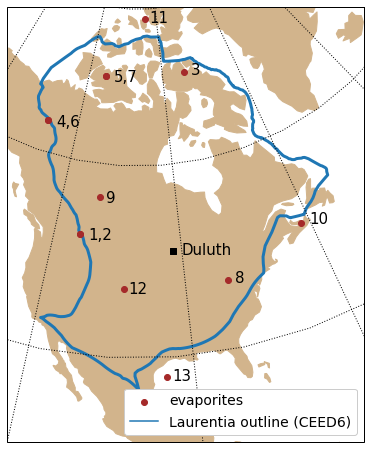

In [6]:


map_ax = make_lambert_map(central_longitude=-100,central_latitude=45)
map_ax.set_extent([-120, -65, 15, 79], ccrs.Geodetic())
map_ax.add_feature(cfeature.LAND,color='tan')
#map_ax.add_feature(cfeature.COASTLINE)
map_ax.scatter(evaporites.lon,evaporites.lat,transform=ccrs.PlateCarree(),zorder=1000,c='brown',label='evaporites')
map_ax.scatter(duluth_lon,duluth_lat,transform=ccrs.PlateCarree(),marker='s',s=40,zorder=1000,c='black')
plt.text(evaporites.lon[0]+2, evaporites.lat[0], '1,2',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[2]+3, evaporites.lat[2], '3',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[3]+3, evaporites.lat[3], '4,6',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[4]+3, evaporites.lat[4], '5,7',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[7]+1.5, evaporites.lat[7], '8',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[8]+1.5, evaporites.lat[8], '9',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[9]+2, evaporites.lat[9], '10',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[10]+2, evaporites.lat[10], '11',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[11]+1, evaporites.lat[11], '12',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(evaporites.lon[12]+1, evaporites.lat[12], '13',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)
plt.text(duluth_lon+2, duluth_lat, 'Duluth',
         horizontalalignment='left',verticalalignment='center',
         transform=ccrs.Geodetic(),fontsize=15)

fname = '../Data/Laurentia_CEED6.shp'

Laurentia_CEED6 = ShapelyFeature(Reader(fname).geometries(),
                                 ccrs.PlateCarree(), edgecolor='C0',linewidth=3,
                                 facecolor='none')
map_ax.add_feature(Laurentia_CEED6)
Laurentia_legend = mlines.Line2D([1], [1], color='C0')

plt.legend([map_ax.get_legend_handles_labels()[0][0],Laurentia_legend],[map_ax.get_legend_handles_labels()[1][0],'Laurentia outline (CEED6)'],fontsize=14,loc=4,framealpha=1)

plt.savefig('../Figures/Laurentia_evaporite_map.pdf')

In [7]:
map_ax.get_legend_handles_labels()[0][0]

## Laurentia post-amalgmation plots

FileNotFoundError: [Errno 2] No such file or directory: '../Figures/recon_time_slices/Laurentia_1750.svg'

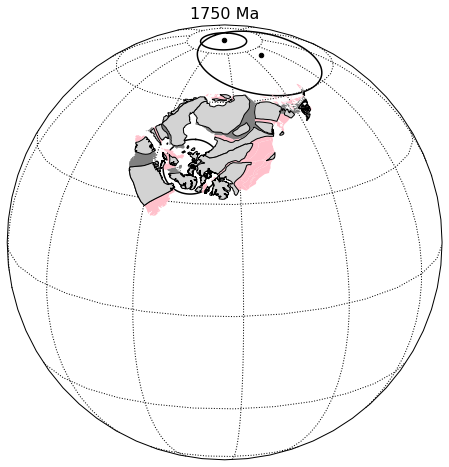

In [8]:
recon_times = [1750,1600,1450,1300,1150,1000,850,700,550]
central_longitudes = [115,102,93,108,114,103,139,153,158]
# recon_times = [700]
# central_longitudes = [153]
# euler_list = [[44.704897,179.774401,-158.264811]]

euler_rotations = pd.read_csv('../Reconstructions/euler_rotations_Laurentia.csv')

for n in range(0,len(recon_times)):

    ax = make_orthographic_map(central_longitude=central_longitudes[n],central_latitude=20)

    shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/{0}Ma_Laurentia.shp'.format(recon_times[n])

    reader = shpreader.Reader(shpfilename)
    units = reader.records()

    for unit in units:

        if unit.attributes['Unit'] == 'Basin' or \
           unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightyellow',
                      label=unit.attributes['Unit'],zorder=76)

        elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='grey',
                      label=unit.attributes['Unit'],zorder=77)
        elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
             unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
             unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
             unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
             unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
             unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
             unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                               facecolor='pink',
                               label=unit.attributes['Unit'],zorder=78)
        elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
             unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
             unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
             unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
             unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                               facecolor='LightSalmon',
                               label=unit.attributes['Unit'],zorder=79)

        elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                          facecolor='lightgrey',edgecolor='black',
                          label=unit.attributes['Unit'],zorder=80)
    
    euler = [euler_rotations.pole_lat[n],euler_rotations.pole_lon[n],euler_rotations.pole_angle[n]]
    selected_poles = Laurentia_poles[(Laurentia_poles['nominal age'] >= (recon_times[n] - 25)) & (Laurentia_poles['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles.index:
        recon_pole = pmag.pt_rot(euler,[selected_poles['PLAT'][i],selected_poles['PLAT'][i]],[selected_poles['PLONG'][i],selected_poles['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles['A95'][i])

    plt.title('{0} Ma'.format(recon_times[n]),fontsize=16)
    plt.savefig('../Figures/recon_time_slices/Laurentia_{0}.svg'.format(recon_times[n]))
    plt.show()
    

In [6]:
Laurentia_Provinces_poles.head()

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,...,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
0,0,Laurentia-Wyoming,Stillwater Complex - C2,new,NaN,NaN,NaN,45.2,249.200000,NaN,...,2008.0,G-cubed,9,23pp,Paleointensity record from the 2.7 Ga Stillwat...,Corresponds to Cenozoic/Present Local Field,\cite{Selkin2008a},NaN,NaN,10049
1,1,Laurentia-Superior(East),Otto Stock dykes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,...,1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043
2,2,Laurentia-Slave,Defeat Suite,new,NaN,C*+,0.0,62.5,245.500000,5.0,...,2014.0,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,\cite{Mitchell2014a},\cite{Davis1999a},NaN,10041
3,3,Laurentia-Superior(East),Ptarmigan-Mistassini dykes,new,NaN,NaN,0.0,54.0,287.000000,3.0,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
4,4,Laurentia-Superior(East),Matachewan dykes R,new,NaN,C+,0.0,48.0,278.000000,NaN,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043


In [1]:
recon_times = [2220,2120,1980,1880,1800,0]
central_longitudes = [90,90,90,90,90,-90]

#10043 is Superior(East)
poles_10043 = Laurentia_Provinces_poles[Laurentia_Provinces_poles.Plate_ID == 10043]
rotations_10043 = pd.read_csv('../Reconstructions/euler_rotations_10043.csv')

#10023 is Superior(East)
poles_10023 = Laurentia_Provinces_poles[Laurentia_Provinces_poles.Plate_ID == 10023]
rotations_10023 = pd.read_csv('../Reconstructions/euler_rotations_10023.csv')

#10041 is Slave
poles_10041 = Laurentia_Provinces_poles[Laurentia_Provinces_poles.Plate_ID == 10041]
rotations_10041 = pd.read_csv('../Reconstructions/euler_rotations_10041.csv')

#10640 is Rae
poles_10640 = Laurentia_Provinces_poles[Laurentia_Provinces_poles.Plate_ID == 10640]
rotations_10640 = pd.read_csv('../Reconstructions/euler_rotations_10640.csv')

#1000 is amalgamated Laurentia
poles_1000 = Laurentia_Provinces_poles[Laurentia_Provinces_poles.Plate_ID == 1000]
rotations_1000 = pd.read_csv('../Reconstructions/euler_rotations_1000.csv')

for n in range(0,len(recon_times)):

    ax = make_mollweide_map(central_longitude=central_longitudes[n])
#    ax = make_orthographic_map(central_longitude=central_longitudes[n])

    shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/{0}Ma_Laurentia.shp'.format(recon_times[n])

    reader = shpreader.Reader(shpfilename)
    units = reader.records()

    for unit in units:

        if unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
            
            if unit.attributes['PLATE_ID'] == 10043:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#7C4E3C',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10023:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#B84014',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10041:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#448D76',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if recon_times[n] < 1950:
                if unit.attributes['PLATE_ID'] == 10640:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#04D291',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
            if recon_times[n] < 1850:
                if unit.attributes['PLATE_ID'] == 10015:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#c2d4dd',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
    if recon_times[n] == 0:
        
        land = NaturalEarthFeature(category='physical', name='land',
                            scale='110m', facecolor=COLORS['land'])

        ax.add_feature(land, facecolor='white',edgecolor='black')
        
                    
    euler_10043 = [rotations_10043.pole_lat[n],rotations_10043.pole_lon[n],rotations_10043.pole_angle[n]]

    selected_poles_10043 = poles_10043[(poles_10043['nominal age'] >= (recon_times[n] - 25)) & (poles_10043['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles_10043.index:
        recon_pole = pmag.pt_rot(euler_10043,[selected_poles_10043['PLAT'][i],selected_poles_10043['PLAT'][i]],[selected_poles_10043['PLONG'][i],selected_poles_10043['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10043['A95'][i],color='#7C4E3C')
    
    euler_10023 = [rotations_10023.pole_lat[n],rotations_10023.pole_lon[n],rotations_10023.pole_angle[n]]

    selected_poles_10023 = poles_10023[(poles_10023['nominal age'] >= (recon_times[n] - 25)) & (poles_10023['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles_10023.index:
        recon_pole = pmag.pt_rot(euler_10023,[selected_poles_10023['PLAT'][i],selected_poles_10023['PLAT'][i]],[selected_poles_10023['PLONG'][i],selected_poles_10023['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10023['A95'][i],color='#B84014')
        
    euler_10041 = [rotations_10041.pole_lat[n],rotations_10041.pole_lon[n],rotations_10041.pole_angle[n]]

    selected_poles_10041 = poles_10041[(poles_10041['nominal age'] >= (recon_times[n] - 25)) & (poles_10041['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles_10041.index:
        recon_pole = pmag.pt_rot(euler_10041,[selected_poles_10041['PLAT'][i],selected_poles_10041['PLAT'][i]],[selected_poles_10041['PLONG'][i],selected_poles_10041['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10041['A95'][i],color='#448D76')
        
    euler_10640 = [rotations_10640.pole_lat[n],rotations_10640.pole_lon[n],rotations_10640.pole_angle[n]]

    selected_poles_10640 = poles_10640[(poles_10640['nominal age'] >= (recon_times[n] - 25)) & (poles_10640['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles_10640.index:
        recon_pole = pmag.pt_rot(euler_10640,[selected_poles_10640['PLAT'][i],selected_poles_10640['PLAT'][i]],[selected_poles_10640['PLONG'][i],selected_poles_10640['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10640['A95'][i],color='#04D291')
        
    euler_1000 = [rotations_1000.pole_lat[n],rotations_1000.pole_lon[n],rotations_1000.pole_angle[n]]

    selected_poles_1000 = poles_1000[(poles_1000['nominal age'] >= (recon_times[n] - 25)) & (poles_1000['nominal age'] <= (recon_times[n] + 25))]
    for i in selected_poles_1000.index:
        recon_pole = pmag.pt_rot(euler_1000,[selected_poles_1000['PLAT'][i],selected_poles_1000['PLAT'][i]],[selected_poles_1000['PLONG'][i],selected_poles_1000['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_1000['A95'][i],color='black')

    plt.title('{0} Ma'.format(recon_times[n]),fontsize=16)
    plt.savefig('../Figures/recon_time_slices/Superior_Slave_{0}.svg'.format(recon_times[n]))
    plt.show()

NameError: name 'Laurentia_Provinces_poles' is not defined

In [8]:
poles_10043

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,...,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
1,1,Laurentia-Superior(East),Otto Stock dykes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,...,1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043
3,3,Laurentia-Superior(East),Ptarmigan-Mistassini dykes,new,NaN,NaN,0.0,54.0,287.000000,3.0,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
4,4,Laurentia-Superior(East),Matachewan dykes R,new,NaN,C+,0.0,48.0,278.000000,NaN,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
5,5,Laurentia-Superior(East),Matachewan dykes N,new,NaN,C+,0.0,48.0,278.000000,NaN,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
7,7,Laurentia-Superior(East),Senneterre dykes,B+93,NaN,C+,0.0,49.0,283.000000,6.0,...,1993.0,Can. J. Earth Sci.,30,1286-1296,Northeast-trending Early Proterozoic dykes of ...,NaN,\cite{Buchan1993a},NaN,changed dp/dm to match Buchan1993,10043
8,8,Laurentia-Superior(East),Nipissing N1 sills,B+00,NaN,C+,0.0,47.0,279.000000,NaN,...,2000.0,Tectonophysics,319,167-198,Comparing the drift of Laurentia and Baltica i...,NaN,\cite{Buchan2000a},NaN,NaN,10043
10,10,Laurentia-Superior(East),Biscotasing dykes,new,NaN,C+,0.0,48.0,280.000000,12.0,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
17,17,Laurentia-Superior(East),Lac Esprit dykes,new,NaN,NaN,0.0,53.0,282.000000,8.0,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,Overlaps with Cenozoic,\cite{Evans2010a},NaN,NaN,10043
20,20,Laurentia-Superior(East),Minto dykes,new,NaN,NaN,0.0,57.0,285.000000,6.0,...,2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,Overlaps with Keweenawan Track,\cite{Evans2010a},NaN,NaN,10043


In [9]:
unit.attributes

{'ANCHOR': 0,
 'TIME': 0.0,
 'FILE1': 'Laurentia.shp',
 'Id': 0,
 'Unit': '> 2.5 Ga Archean crust',
 'PLATE_ID': 10036,
 'Name': 'Greenland_Rae',
 'begin': 3000,
 'end': 0}

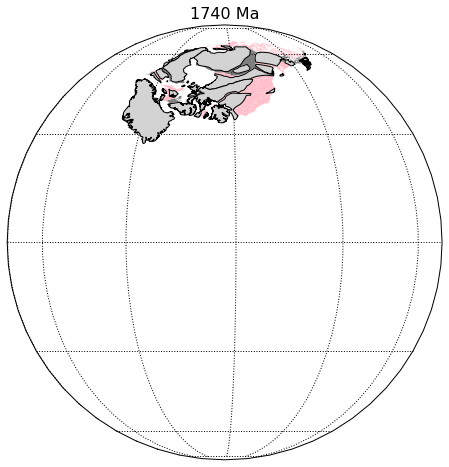

In [10]:
ax = make_orthographic_map(central_longitude=117)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1740Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1740 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1740.svg')
plt.show()

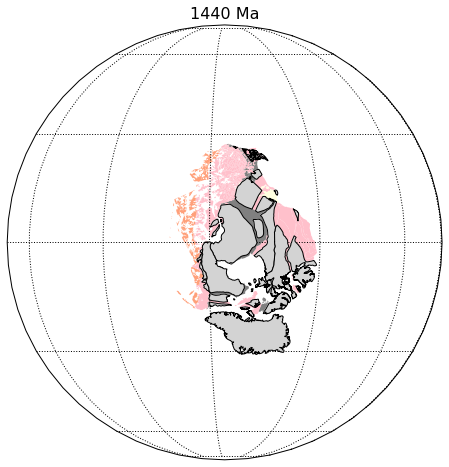

In [11]:
ax = make_orthographic_map(central_longitude=94)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1440Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1440 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1440.svg')
plt.show()

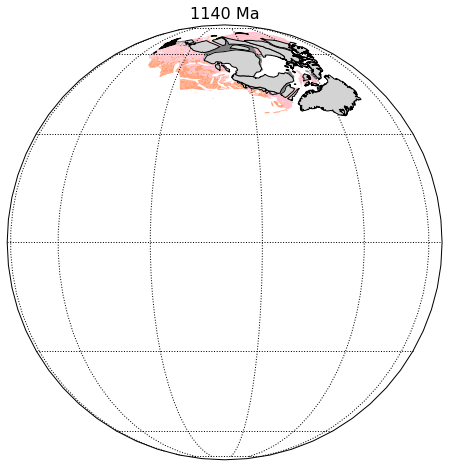

In [12]:
ax = make_orthographic_map(central_longitude=110)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/1140Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('1140 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_1140.svg')
plt.show()

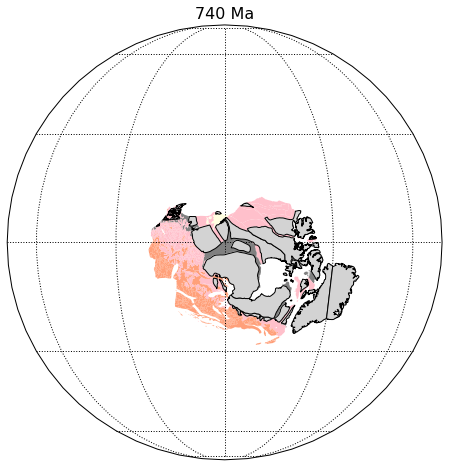

In [13]:
ax = make_orthographic_map(central_longitude=150)

shpfilename = '../Reconstructions/Proterozoic_Laurentia_simple/740Ma_Laurentia.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)

plt.title('740 Ma',fontsize=16)
plt.savefig('../Figures/Laurentia_740.svg')
plt.show()